<a href="https://colab.research.google.com/github/rezar12/MASTERMODEL/blob/main/FINALEMemoireLASTEDVariantPangoversamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MATRICE DATA NEXTCLADE_PANGO

In [1]:
! pip install scikit-learn scikeras tensorflow pandas mlflow numpy plotly matplotlib imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 7.9 MB/s 
     |████████████████████████████████| 147 kB 62.1 MB/s 
     |████████████████████████████████| 181 kB 64.0 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 209 kB 57.7 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 146 kB 61.3 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.3-py3-none-any.whl size=139102 sha256=e705147cee1bbce9430dba7851c00a72d5931efd42babca61f9b7a7fc880f118
  Stored in directory: /root/.cache/pip/wheels/3f/73/87/c1e4b2145eb6049bb6c9aaf7ea1e38302b77ca219b6fef5d5c


In [2]:
import pandas as pd
import numpy as np

### data before ML prepocessing data NEXTNextclade_pango_PANGO

In [3]:
! unzip '/content/MATRICESNPSPANGO.zip'

Archive:  /content/MATRICESNPSPANGO.zip
  inflating: Matricepango.tsv        


In [4]:
dataPango = pd.read_csv('/content/Matricepango.tsv',sep="\t",low_memory=False)

In [5]:
# remplacons les indices par le unnamed EPI_ISL
dataPango.index=dataPango['Unnamed: 0']

In [6]:
dataPango = dataPango.iloc[:,1:]

In [7]:
dataPango.index.names = ['Sequence']

In [8]:
dataPango

,SNP0,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,...,SNP9537,SNP9538,SNP9539,SNP9540,SNP9543,SNP9544,SNP9545,SNP9546,SNP9547,Nextclade_pango
Sequence,,,,,,,,,,,,,,,,,,,,,
EPI_ISL_14799150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
EPI_ISL_14799151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
EPI_ISL_14799152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
EPI_ISL_14799154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
EPI_ISL_14799155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_15125282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
EPI_ISL_15125283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.2.1
EPI_ISL_15125284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA.5.1


### data preposcessing

In [9]:
featurename = dataPango.columns

In [10]:
featurename

Index(['SNP0', 'SNP2', 'SNP3', 'SNP4', 'SNP5', 'SNP6', 'SNP7', 'SNP8', 'SNP9',
       'SNP10',
       ...
       'SNP9537', 'SNP9538', 'SNP9539', 'SNP9540', 'SNP9543', 'SNP9544',
       'SNP9545', 'SNP9546', 'SNP9547', 'Nextclade_pango'],
      dtype='object', length=8135)

In [11]:
dataPango['Nextclade_pango'].value_counts()

BA.5.2      1941
BA.5.1      1216
BA.5.2.1    1128
BF.5         437
BA.4.6       363
BA.4.1       292
BF.7         233
BA.5         215
XAS          210
BA.2         188
BE.1         183
BE.1.1       173
BA.5.6       109
Name: Nextclade_pango, dtype: int64

In [12]:
viz = pd.DataFrame(data={'Nextclade_pango':list(dataPango['Nextclade_pango'].value_counts().index), 'Nombres de sequence':list(dataPango['Nextclade_pango'].value_counts().values)})

In [13]:
from plotly import express as px

fig = px.bar(data_frame=viz,x='Nextclade_pango',y='Nombres de sequence',text_auto='',
            title="NOMBRES DE SEQUENCES PAR Nextclade_pango")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### SMOTE

In [14]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [15]:
data=dataPango.values

In [16]:
X,y=data[:,:-1],data[:,-1]

In [17]:
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y)

In [18]:
np.unique(encoded_Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

classe: 6, nombres: 1128, ratio : 16.86602870813397
classe: 4, nombres: 1216, ratio : 18.181818181818183
classe: 2, nombres: 363, ratio : 5.427631578947369
classe: 1, nombres: 292, ratio : 4.366028708133971
classe: 3, nombres: 215, ratio : 3.214712918660287
classe: 11, nombres: 233, ratio : 3.4838516746411483
classe: 5, nombres: 1941, ratio : 29.022129186602868
classe: 7, nombres: 109, ratio : 1.6297846889952152
classe: 12, nombres: 210, ratio : 3.1399521531100474
classe: 0, nombres: 188, ratio : 2.811004784688995
classe: 10, nombres: 437, ratio : 6.534090909090909
classe: 8, nombres: 183, ratio : 2.736244019138756
classe: 9, nombres: 173, ratio : 2.5867224880382773


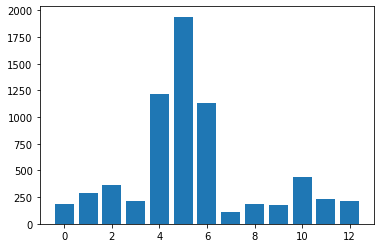

In [19]:
counter = Counter(encoded_Y)
for k,v in counter.items():
  per = v / len(encoded_Y) * 100
  print(f'classe: {k}, nombres: {v}, ratio : {per}')
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
oversample = RandomOverSampler(random_state=42)

In [22]:
X_smote,y_smote = oversample.fit_resample(X,encoded_Y)

classe: 6, nombres: 1941, ratio : 29.022129186602868
classe: 4, nombres: 1941, ratio : 29.022129186602868
classe: 2, nombres: 1941, ratio : 29.022129186602868
classe: 1, nombres: 1941, ratio : 29.022129186602868
classe: 3, nombres: 1941, ratio : 29.022129186602868
classe: 11, nombres: 1941, ratio : 29.022129186602868
classe: 5, nombres: 1941, ratio : 29.022129186602868
classe: 7, nombres: 1941, ratio : 29.022129186602868
classe: 12, nombres: 1941, ratio : 29.022129186602868
classe: 0, nombres: 1941, ratio : 29.022129186602868
classe: 10, nombres: 1941, ratio : 29.022129186602868
classe: 8, nombres: 1941, ratio : 29.022129186602868
classe: 9, nombres: 1941, ratio : 29.022129186602868


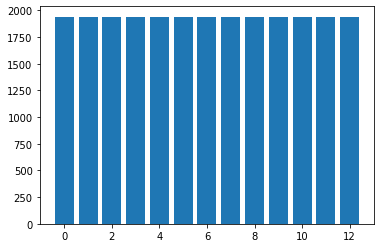

In [23]:
counter = Counter(y_smote)
for k,v in counter.items():
  per = v / len(encoded_Y) * 100
  print(f'classe: {k}, nombres: {v}, ratio : {per}')
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [24]:
X = X_smote
Y = y_smote

In [25]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [26]:
X.shape

(25233, 8134)

In [27]:
Y.shape

(25233,)

In [28]:
encoder.inverse_transform(Y)

array(['BA.5.2.1', 'BA.5.2.1', 'BA.5.2.1', ..., 'XAS', 'XAS', 'XAS'],
      dtype=object)

# Feature Reduction

In [29]:
from sklearn.model_selection import train_test_split
train_ratio = 0.80
test_ratio = 0.10
val_ratio = 0.10



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=1-train_ratio)
X_val,X_test,Y_val,Y_test = train_test_split(X,Y,random_state=42,test_size=test_ratio/(val_ratio+test_ratio))

In [30]:
Counter(encoder.inverse_transform(Y_train))

Counter({'BE.1': 1585,
         'BA.5': 1552,
         'BA.2': 1530,
         'BF.7': 1555,
         'BA.5.2.1': 1549,
         'BE.1.1': 1559,
         'XAS': 1536,
         'BA.5.6': 1564,
         'BF.5': 1543,
         'BA.5.1': 1558,
         'BA.5.2': 1544,
         'BA.4.6': 1563,
         'BA.4.1': 1548})

In [31]:
Counter(encoder.inverse_transform(Y_test))

Counter({'BA.4.6': 966,
         'BA.5.2.1': 995,
         'BA.5': 964,
         'BF.5': 967,
         'BE.1.1': 966,
         'BA.2': 988,
         'BA.5.2': 955,
         'XAS': 968,
         'BE.1': 956,
         'BA.4.1': 999,
         'BA.5.6': 960,
         'BF.7': 963,
         'BA.5.1': 970})

In [32]:
Counter(encoder.inverse_transform(Y_val))

Counter({'BA.5.2.1': 946,
         'BA.2': 953,
         'BA.5.1': 971,
         'BE.1': 985,
         'BF.5': 974,
         'BA.5.6': 981,
         'BA.4.1': 942,
         'XAS': 973,
         'BA.5.2': 986,
         'BE.1.1': 975,
         'BA.5': 977,
         'BA.4.6': 975,
         'BF.7': 978})

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Convient uniquement à l'ensemble d'entraînement. 
scaler.fit(X_train)
# Appliquez la transformation à la fois à l'ensemble d'apprentissage et à l'ensemble de test. 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.0121918 , -0.01724309, -0.00995431, ..., -0.07502968,
        -0.00703859, -0.01724309],
       [-0.0121918 , -0.01724309, -0.00995431, ..., -0.07502968,
        -0.00703859, -0.01724309],
       [-0.0121918 , -0.01724309, -0.00995431, ..., -0.07502968,
        -0.00703859, -0.01724309],
       ...,
       [-0.0121918 , -0.01724309, -0.00995431, ..., -0.07502968,
        -0.00703859, -0.01724309],
       [-0.0121918 , -0.01724309, -0.00995431, ..., -0.07502968,
        -0.00703859, -0.01724309],
       [-0.0121918 , -0.01724309, -0.00995431, ..., -0.07502968,
        -0.00703859, -0.01724309]])

# Mise en place de l'ACP avec une conservation de la variance a 95%

In [35]:
from sklearn.decomposition import PCA
# création d'une instance de l'acp
acp = PCA(.95)

In [36]:
acp.fit(X_train)

PCA(n_components=0.95)

In [37]:
from pickle import dump

In [38]:
# save scaler
dump(scaler, open('scalerPango.pkl', 'wb'))
# save acp
dump(acp, open('acpPango.pkl', 'wb'))

In [39]:
X_train = acp.transform(X_train)
X_test = acp.transform(X_test)

In [40]:
X_train.shape

(20186, 3229)

In [41]:
numclass=len(np.unique(Y_train))

In [42]:
numclass

13

# GRID SEARCH

In [45]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from scikeras.wrappers import KerasClassifier

# creation du classifier reseau de neurone
def create_model(neurone,dropout):
	# creation du modele
	model = Sequential()
	model.add(Dense(neurone, input_shape=(X_train.shape[1],), activation='relu'))
	model.add(Dropout(dropout))
	model.add(Dense(numclass, activation='softmax'))
	return model



model = KerasClassifier(model=create_model, loss="categorical_crossentropy",verbose=1,metrics=['accuracy'],dropout=0.2,neurone=200)
# definir les parametres du grid search
neurone = [80,100,200,400,800]
dropout = [0.1,0.2,0.3,0.5]
batch_size= [16,32,64]
epochs=[30,40,60]
optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer,neurone=neurone,dropout=dropout)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)

In [46]:
grid_result = grid.fit(X_train,Y_train)
# resumer du model
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 11/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0224 - accuracy: 0.9966
Epoch 12/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0237 - accuracy: 0.9971
Epoch 13/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0388 - accuracy: 0.9959
Epoch 14/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0237 - accuracy: 0.9965
Epoch 15/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0166 - accuracy: 0.9976
Epoch 16/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0279 - accuracy: 0.9970
Epoch 17/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0283 - accuracy: 0.9966
Epoch 18/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0243 - accuracy: 0.9961
Epoch 19/40
158/158 [==============================] - 1s 6ms/step - loss: 0.0245 - accuracy: 0.9969
Epoch 20/40
1

In [47]:
# meilleur score de classication est :

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.983256 using {'batch_size': 32, 'dropout': 0.5, 'epochs': 60, 'neurone': 80, 'optimizer': 'Adam'}


# BEST MODEL

In [48]:
import tensorflow
classifier = Sequential()
classifier.add(Dense(80, input_shape=(X_train.shape[1],), activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(numclass, activation='softmax'))
classifier.compile(loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',metrics=["accuracy"])
# APPLIQUATION DU MODELE AU DONNÉES D'ENTRAINEMENT
history=classifier.fit(X_train,Y_train, epochs=60,batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/60
631/631 [==============================] - 3s 4ms/step - loss: 1.0834 - accuracy: 0.7800 - val_loss: 0.0721 - val_accuracy: 0.9846
Epoch 2/60
631/631 [==============================] - 2s 3ms/step - loss: 0.1480 - accuracy: 0.9659 - val_loss: 0.0483 - val_accuracy: 0.9900
Epoch 3/60
631/631 [==============================] - 2s 3ms/step - loss: 0.0971 - accuracy: 0.9791 - val_loss: 0.0437 - val_accuracy: 0.9899
Epoch 4/60
631/631 [==============================] - 2s 3ms/step - loss: 0.0800 - accuracy: 0.9826 - val_loss: 0.0482 - val_accuracy: 0.9896
Epoch 5/60
631/631 [==============================] - 2s 3ms/step - loss: 0.0641 - accuracy: 0.9846 - val_loss: 0.0485 - val_accuracy: 0.9905
Epoch 6/60
631/631 [==============================] - 2s 3ms/step - loss: 0.0718 - accuracy: 0.9863 - val_loss: 0.0466 - val_accuracy: 0.9906
Epoch 7/60
631/631 [==============================] - 2s 3ms/step - loss: 0.0600 - accuracy: 0.9879 - val_loss: 0.0549 - val_accuracy: 0.9907
Epoch 

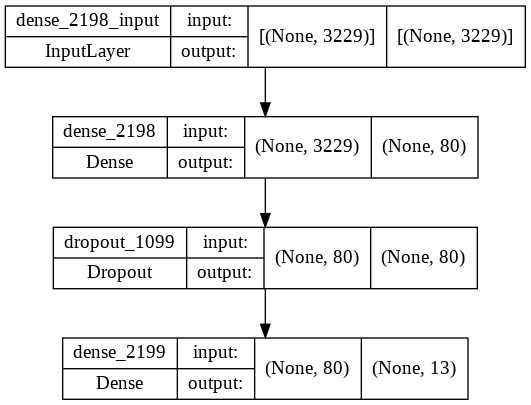

In [49]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [50]:
classifier.evaluate(X_test, Y_test)

395/395 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9948


[0.05919104069471359, 0.9948481917381287]

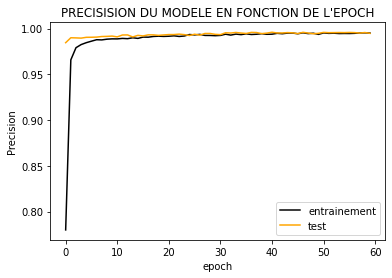

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color="black")
plt.plot(history.history['val_accuracy'],color="orange")
plt.title("PRECISISION DU MODELE EN FONCTION DE L'EPOCH")
plt.ylabel("Precision")
plt.xlabel("epoch")
plt.legend(['entrainement','test'],loc='lower right')
plt.show()

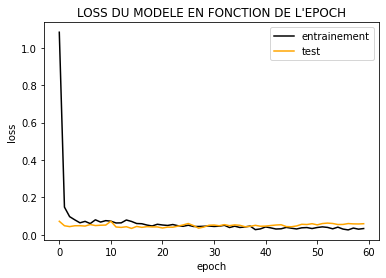

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color="black")
plt.plot(history.history['val_loss'],color="orange")
plt.title("LOSS DU MODELE EN FONCTION DE L'EPOCH")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['entrainement','test'],loc='upper right')
plt.show()

In [53]:
# save model
dump(classifier, open('model.pkl', 'wb'))

In [54]:
pred=classifier.predict(X_test)
Y_labelencodePred=np.argmax(pred, axis=1)

In [55]:
encoder.inverse_transform(Y_labelencodePred)

array(['BA.4.6', 'BA.5.2.1', 'BA.5', ..., 'BF.5', 'BF.5', 'BA.5.1'],
      dtype=object)

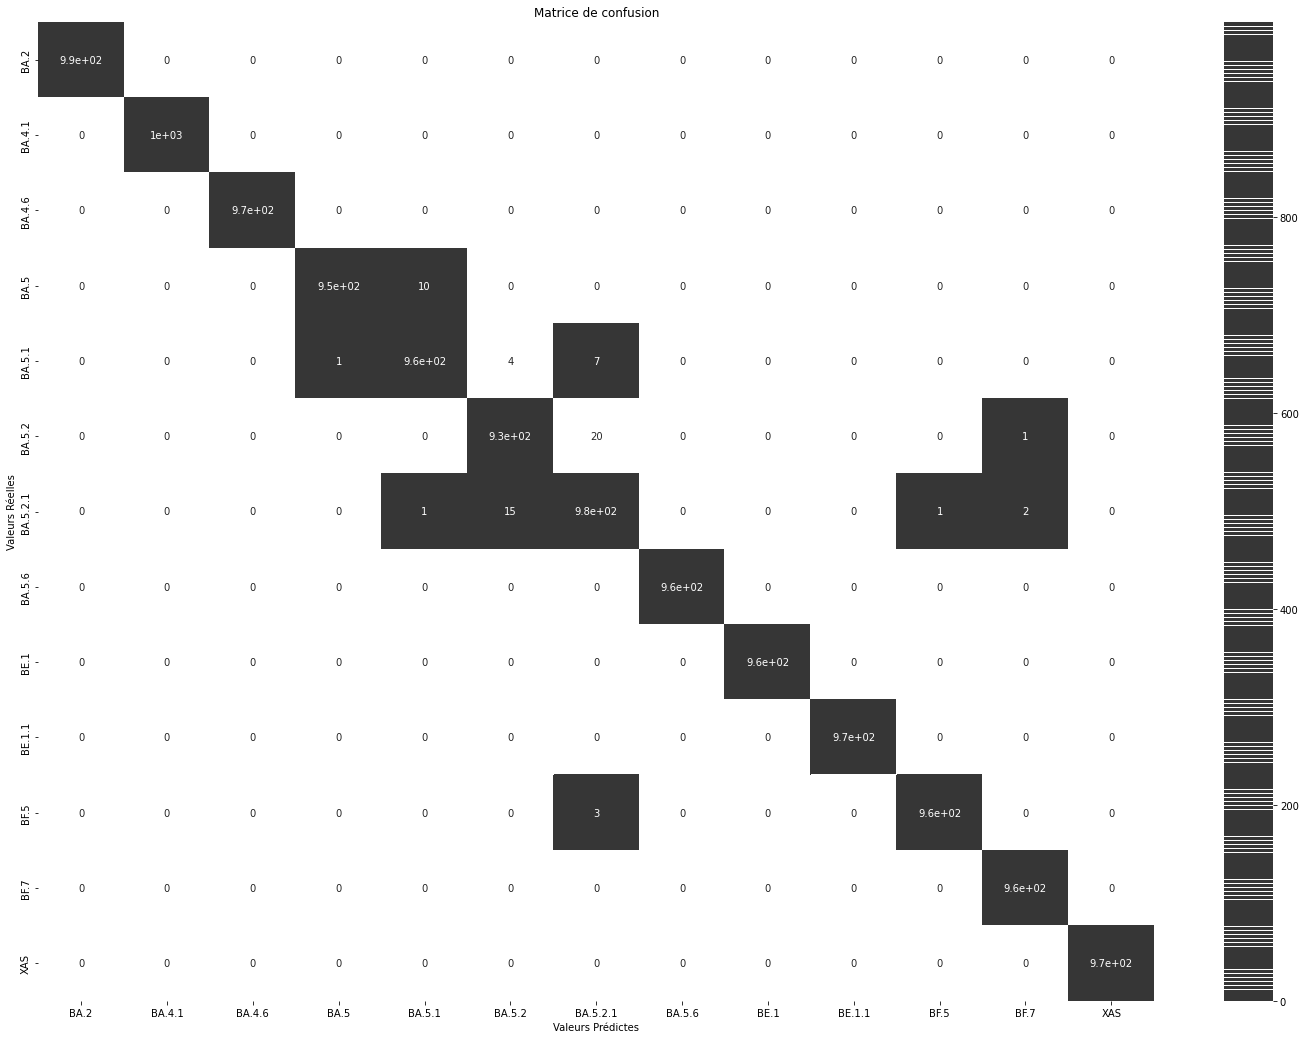

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 18))
CM = confusion_matrix(encoder.inverse_transform(Y_test), encoder.inverse_transform(Y_labelencodePred))
mypalette = ['#ffff','#363636','#363636','#363636','#363636','#363636','#363636','#363636']
sns.heatmap(CM, annot=True,cmap=sns.color_palette(mypalette, 2000),)
ax.set_xlabel('Valeurs Prédictes');ax.set_ylabel('Valeurs Réelles'); 
ax.set_title('Matrice de confusion'); 
ax.xaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_test)))); ax.yaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_labelencodePred))));

In [63]:
from sklearn.metrics import classification_report
report = classification_report(encoder.inverse_transform(Y_test), encoder.inverse_transform(Y_labelencodePred),labels=sorted(np.unique(encoder.inverse_transform(Y_test))),output_dict=True)

In [64]:
dataplot=pd.DataFrame(data=report)

In [65]:
dataplot=dataplot.T
dataplot=dataplot*100

In [66]:
dataplot

,precision,recall,f1-score,support
BA.2,100.000000,100.000000,100.000000,9.880000e+04
BA.4.1,100.000000,100.000000,100.000000,9.990000e+04
BA.4.6,100.000000,100.000000,100.000000,9.660000e+04
BA.5,99.895288,98.962656,99.426785,9.640000e+04
BA.5.1,98.864809,98.762887,98.813822,9.700000e+04
BA.5.2,98.006296,97.801047,97.903564,9.550000e+04
BA.5.2.1,97.017893,98.090452,97.551224,9.950000e+04
BA.5.6,100.000000,100.000000,100.000000,9.600000e+04
BE.1,100.000000,100.000000,100.000000,9.560000e+04
BE.1.1,100.000000,100.000000,100.000000,9.660000e+04


## Nouvelle Prediction

In [67]:
from pickle import load
scalerimport = load(open('scalerPango.pkl', 'rb'))
acpimport = load(open('acpPango.pkl', 'rb'))

In [68]:
# import model
modelimport = load(open('model.pkl', 'rb'))

In [69]:
valpredict = scalerimport.transform(X_val)
valpredictacp = acpimport.transform(valpredict)

In [70]:
valpredictacp.shape

(12616, 3229)

In [71]:
modelimport.evaluate(valpredictacp, Y_val)

395/395 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9990


[0.004177731927484274, 0.998969554901123]

In [72]:
ypredval = modelimport.predict(valpredictacp)

In [73]:
Y_labelencodePredval=np.argmax(ypredval, axis=1)

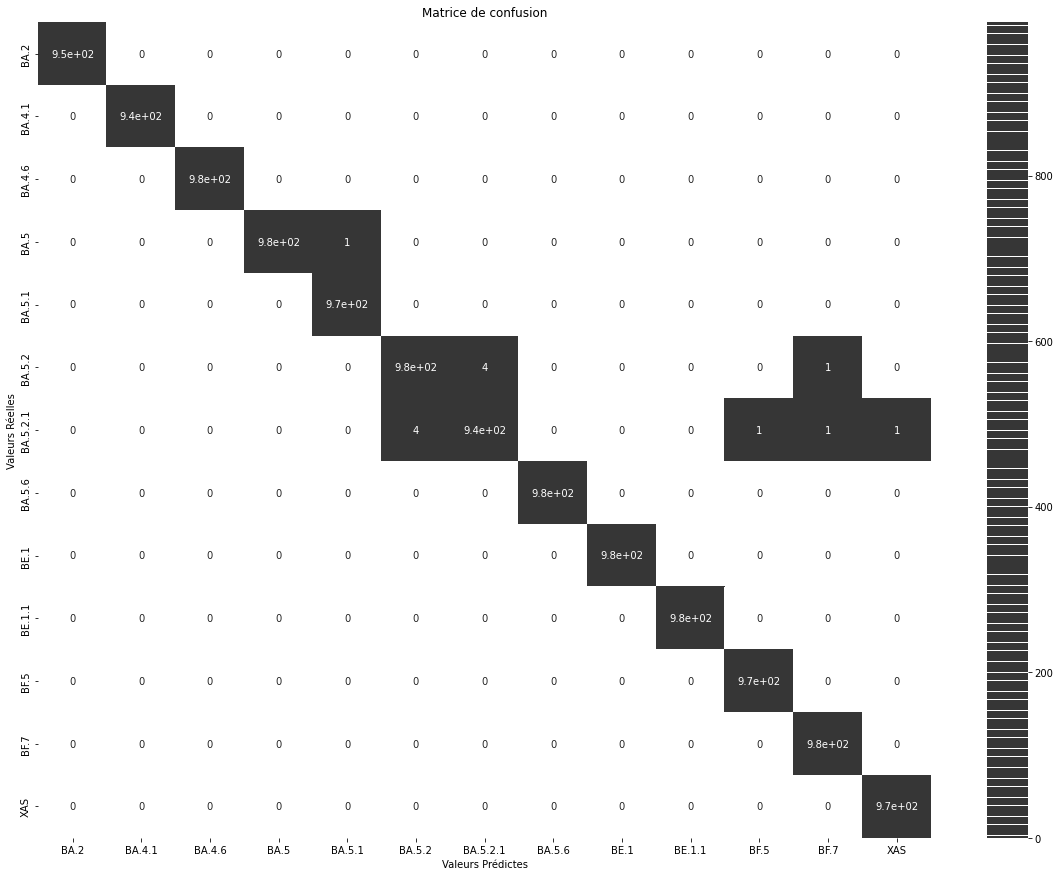

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import  matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(20, 15))
CM = confusion_matrix(encoder.inverse_transform(Y_val), encoder.inverse_transform(Y_labelencodePredval))
mypalette = ['#ffff','#363636','#363636','#363636','#363636','#363636','#363636','#363636','#363636','#363636']
sns.heatmap(CM, annot=True,cmap=sns.color_palette(mypalette, 3000),)
ax.set_xlabel('Valeurs Prédictes');ax.set_ylabel('Valeurs Réelles'); 
ax.set_title('Matrice de confusion'); 
ax.xaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_val)))); ax.yaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_labelencodePredval))));